In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CNCnoise_1.csv to CNCnoise_1.csv


In [27]:
data = pd.read_csv("CNCnoise_1.csv", header=None)
data.columns = ['noise']

In [28]:
# 윈도우 시계열 구성
def create_dataset(data, look_back=10):
    X = []
    for i in range(len(data) - look_back):
        window = data[i:(i + look_back)].values.flatten()
        X.append(window)
    return np.array(X)

look_back = 10
X = create_dataset(data['noise'], look_back)
noise_full = data['noise'].values[look_back:]  # 전체 대상 y 값

In [29]:
# 1. K-means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans_labels], axis=1)
threshold_kmeans = np.percentile(distances, 95)
is_outlier_kmeans = distances > threshold_kmeans

In [30]:
# 2. Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso_labels = iso.fit_predict(X)
is_outlier_iso = iso_labels == -1


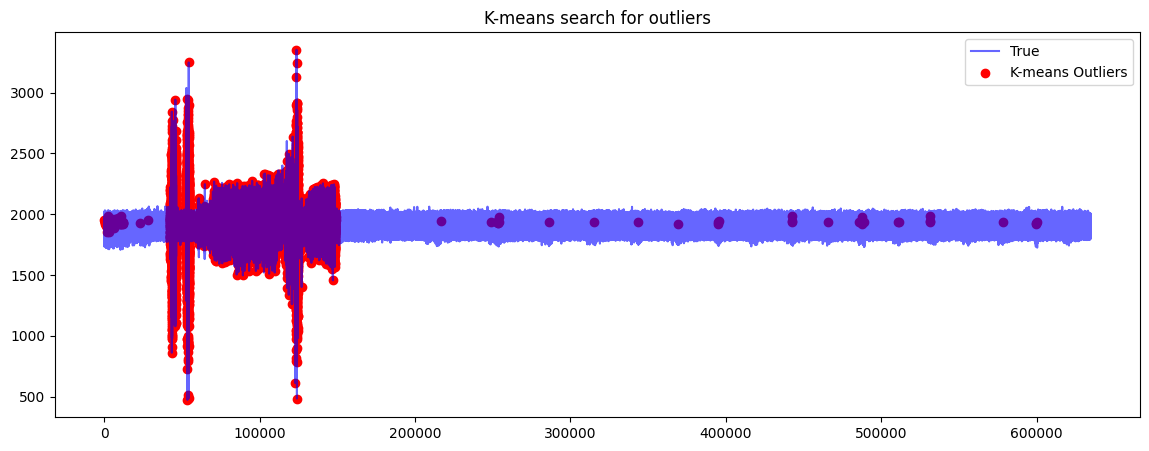

In [32]:
# 시각화  - K-means
plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(noise_full)), noise_full, label='True', color='blue', alpha=0.6)
plt.scatter(np.where(is_outlier_kmeans)[0], noise_full[is_outlier_kmeans], color='red', label='K-means Outliers')
plt.title("K-means search for outliers")
plt.legend()
plt.show()

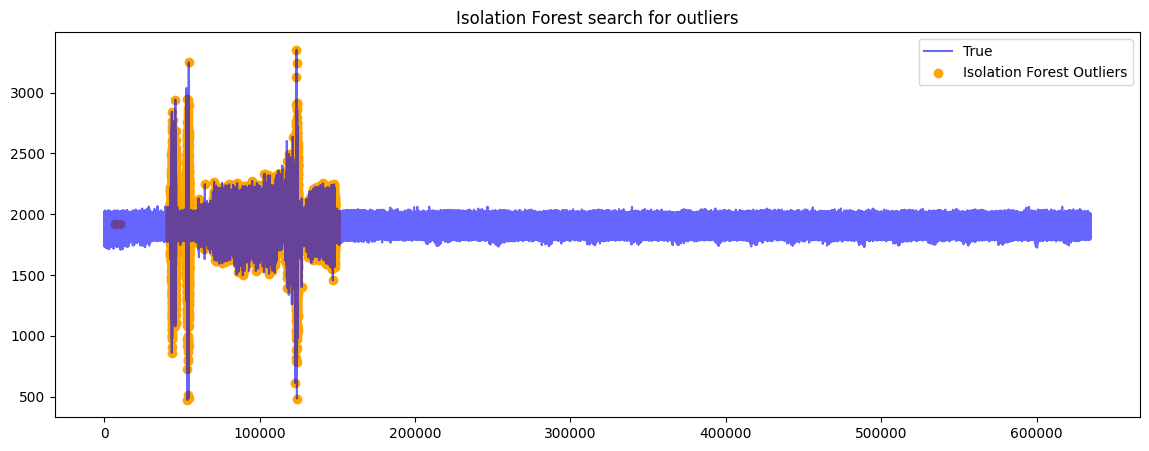

In [33]:
# 시각화 - Isolation Forest
plt.figure(figsize=(14, 5))
plt.plot(np.arange(len(noise_full)), noise_full, label='True', color='blue', alpha=0.6)
plt.scatter(np.where(is_outlier_iso)[0], noise_full[is_outlier_iso], color='orange', label='Isolation Forest Outliers')
plt.title("Isolation Forest search for outliers")
plt.legend()
plt.show()